# D208 P.A. : TASK 1 MULTIPLE REGRESSION FOR PREDICTIVE MODELING

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39419150-cc20-4a0e-8702-ad0b01351db1" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39419150-cc20-4a0e-8702-ad0b01351db1

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part I: Research Question

#### A.  Describe the purpose of this data analysis by doing the following:

##### 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.

the customer's 'MonthlyCharge' supposed to be one of the most important features to any company, probably the company's profit depends on increasing the Monthly Charge of all customers, I think it can be considered the second most important variable included in the Churn data set (coming after the 'Churn' variable), and specifically the first most important continuous variable.

Multiple regression will be used to check the factors and features that affect the MonthlyCharge and the significance of each of them.

-------------------------------------------------------------------------------------------------------------------

##### 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

Obviously, the monthly charge of each customer depends the most on the number and types of services provided,  but some of them may be more important than others. and more significant than others.
the objective of the data analysis is to identify the features and to test their inter relationships in order to build a multiple regression prediction model that can be used to predict the monthly charge of each customer based on available features or criteria.
thus giving the stake holders the insight to avoid the negative factors and to support the positive ones that may affect the monthly charge , and probably the company's profit.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part II: Method Justification

#### B.  Describe multiple regression methods by doing the following:

##### 1.  Summarize the assumptions of a multiple regression model.

1. A linear relationship is assumed between the dependent variable and the independent variables, we can't accurately find out the exact parameters of this relationship, but we are getting close estimations through linear regression models.  
2. Regression residuals must be normally distributed, meaning that the residuals are concenrtated around the model ( model mean or model line) hence the model could catch all the the linear features , otherwise, the model would be less describtive.
3. The residuals are homoscedastic and approximately rectangular-shaped.meaning that the variance of risiduals is constant and errors are caused by random  factors that affects all predictions randomly, without any significant defference .  
4. Absence of multicollinearity is expected in the model, when two or more independent variables are highly correlated with one another in a regression model (https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)
5. No Autocorrelation of the residuals.meaning that the errors are independent from each other.

After :
- https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/multi-linear-regression/Machine%20Learning%20-%20Multi%20Linear%20Regression%20Analysis.ipynb

- https://www.youtube.com/watch?v=0MFpOQRY0rw&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=7


-------------------------------------------------------------------------------------------------------------------

##### 2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

Selected Python, the general-purpose, interpreted, object-oriented language, which supports many useful packages for creating linear models
Selected Python libraries such as:

* Pandas : For data manipulation and analysis.
* numpy : The core of every analytical solution in the Python language. It provides the user with multidimensional arrays, along with a large set of functions to operate multiple mathematical operations on these arrays.
* Matplotlib: for visualization
* SciPy: Completes NumPy's functionalities, offering a larger variety of scientific algorithms for linear algebra, sparse matrices, signal and image processing, optimization, fast Fourier transformation, and much more.
* statsmodels: It features generalized linear models, discrete choice models, and a series of descriptive statistics as well as parametric and nonparametric tests.
* Scikit-learn: Offers many functions for data preprocessing, supervised and unsupervised learning, model selection, validation, and error metrics.

-------------------------------------------------------------------------------------------------------------------

##### 3.  Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.

The monthly charge of each customer obviously depends the most on the number and types of services provided, but some of them may be more important than others. and more significant than others.
Multiple regression is an appropriate technique to check the factors and features that affect the MonthlyCharge and the significance of each of them, by modelling the relationship between multiple explanatory variables to the single dependent variable ('MonthlyCharge') .
and more important , to predict the monthly charge of each customer based on the selected features.


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Exploring the Data

#### Importing Libraries:

In [1]:
#imporing the needed libraries.
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #modified Pandas options to fully display the large dataset when needed
## !!! Trying to Display a full Dataframe may cause a problem.
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#### Reading the CSV Data:

In [2]:
#Reading the Data file (As received) churn_clean.csv 
df_raw= pd.read_csv('churn_clean.csv')
target='MonthlyCharge'
df_raw.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  Population      Area             TimeZone  \
0  99927  56.25100 -133.37571          38     Urban        America/Sitka   
1  48661  44.32893  -84.24080       10446     Urban      America/Detroit   
2  97148  45.35589 -123.24657        3735     Urban  America/Los_Angeles   
3  92014  32.96687 -117.24798       13863  Suburban  America/Los_Angeles   
4  77461  29.38012  -95.80673       11352  Suburban      America/Chicago   

                                 Job  Children  Age    Income    Marital  \
0  Environmental health practitioner         0   68  28561.99    Widowed   
1             Programmer, multimedia         1   27  21704.77    Married   
2            Chief Financial Officer         4   50   9609.57    Widowed   
3                          Solicitor         1   48  18925.23    Married   
4                Medical illustrator         0   83  40074.19  Separated   

   Gender Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  \
0    Male    No            7.978323     10         0                     1   
1  Female   Yes           11.699080     12         0                     1   
2  Female    No           10.752800      9         0                     1   
3    Male    No           14.913540     15         2                     0   
4    Male   Yes            8.147417     16         2                     1   

  Techie        Contract Port_modem Tablet InternetService Phone Multiple  \
0     No        One year        Yes    Yes     Fiber Optic   Yes       No   
1    Yes  Month-to-month         No    Yes     Fiber Optic   Yes      Yes   
2    Yes        Two Year        Yes     No             DSL   Yes      Yes   
3    Yes        Two Year         No     No             DSL   Yes       No   
4     No  Month-to-month        Yes     No     Fiber Optic    No       No   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0            Yes          Yes               No          No          No   
1            Yes           No               No          No         Yes   
2             No           No               No          No          No   
3            Yes           No               No          No         Yes   
4             No           No               No         Yes         Yes   

  StreamingMovies PaperlessBilling             PaymentMethod     Tenure  \
0             Yes              Yes   Credit Card (automatic)   6.795513   
1             Yes              Yes  Bank Transfer(automatic)   1.156681   
2             Yes              Yes   Credit Card (automatic)  15.754144   
3              No              Yes              Mailed Check  17.087227   
4              No               No              Mailed Check   1.670972   

   MonthlyCharge  Bandwidth_GB_Year  Item1  Item2  Item3  Item4  Item5  Item6  \
0     172.455519         904.536110      5      5      5      3      4      4   
1     242.632554         800.982766      3      4      3      3      4      3   
2     159.947583        2054.706961      4      4      2      4      4      3   
3     119.956840        2164.579412      4      4    

#### Data info:

In [3]:
df_raw.info() #Data Information of the Raw DataFrame (As received)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
raw_variables=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
               'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
               'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
               'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
               'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
               'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
               'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
               'Item6', 'Item7', 'Item8']

num_variables = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children',
                 'Age','Income', 'Outage_sec_perweek', 'Email', 'Contacts',
                 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
                 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

categ_variables = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
                   'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract',
                   'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

print('raw_variables:',len(raw_variables),'  num_variables:',len(num_variables),'  cat_variables:',len(categ_variables))

raw_variables: 50   num_variables: 23   cat_variables: 27


#### Summary statistics:

In [5]:
#Summary statistics of Numerical variables of the Raw DataFrame
df_raw.describe().T  #Transposed to show large number of variables displayed as rows

count          mean           std         min  \
CaseOrder             10000.0   5000.500000   2886.895680    1.000000   
Zip                   10000.0  49153.319600  27532.196108  601.000000   
Lat                   10000.0     38.757567      5.437389   17.966120   
Lng                   10000.0    -90.782536     15.156142 -171.688150   
Population            10000.0   9756.562400  14432.698671    0.000000   
Children              10000.0      2.087700      2.147200    0.000000   
Age                   10000.0     53.078400     20.698882   18.000000   
Income                10000.0  39806.926771  28199.916702  348.670000   
Outage_sec_perweek    10000.0     10.001848      2.976019    0.099747   
Email                 10000.0     12.016000      3.025898    1.000000   
Contacts              10000.0      0.994200      0.988466    0.000000   
Yearly_equip_failure  10000.0      0.398000      0.635953    0.000000   
Tenure                10000.0     34.526188     26.443063    1.000259   
MonthlyCharge         10000.0    172.624816     42.943094   79.978860   
Bandwidth_GB_Year     10000.0   3392.341550   2185.294852  155.506715   
Item1                 10000.0      3.490800      1.037797    1.000000   
Item2                 10000.0      3.505100      1.034641    1.000000   
Item3                 10000.0      3.487000      1.027977    1.000000   
Item4                 10000.0      3.497500      1.025816    1.000000   
Item5                 10000.0      3.492900      1.024819    1.000000   
Item6                 10000.0      3.497300      1.033586    1.000000   
Item7                 10000.0      3.509500      1.028502    1.000000   
Item8                 10000.0      3.495600      1.028633    1.000000   

                               25%           50%           75%            max  
CaseOrder              2500.750000   5000.500000   7500.250000   10000.000000  
Zip                   26292.500000  48869.500000  71866.500000   99929.000000  
Lat                      35.341828     39.395800     42.106908      70.640660  
Lng                     -97.082813    -87.918800    -80.088745     -65.667850  
Population              738.000000   2910.500000  13168.000000  111850.000000  
Children                  0.000000      1.000000      3.000000      10.000000  
Age                      35.000000     53.000000     71.000000      89.000000  
Income                19224.717500  33170.605000  53246.170000  258900.700000  
Outage_sec_perweek        8.018214     10.018560     11.969485      21.207230  
Email                    10.000000     12.000000     14.000000      23.000000  
Contacts                  0.000000      1.000000      2.000000       7.000000  
Yearly_equip_failure      0.000000      0.000000      1.000000       6.000000  
Tenure                    7.917694     35.430507     61.479795      71.999280  
MonthlyCharge           139.979239    167.484700    200.734725     290.160419  
Bandwidth_GB_Year      1236.470827   3279.536903   5586.141369    7158.981530  
Item1                     3.000000      3.000000      4.000000       7.000000  
Item2                     3.000000      4.000000      4.000000       7.000000  
Item3                     3.000000      3.000000      4.000000       8.000000  
Item4                     3.000000      3.000000      4.000000       7.000000  
Item5                     3.000000      3.000000      4.000000       7.000000  
Item6                     3.000000      3.000000      4.000000       8.000000  
Item7                     3.000000      4.000000      4.000000       7.000000  
Item8                     3.000000      3.000000      4.000000       8.000000

####  Data visualization:

*Function plt_summary()  to inspect the data visually usind Histogram, Boxplot and scattered plots.
The following function is defined to visually identify  statistical parameters and to get the sense from the Data, such as identify the outliers , ranges, dominant values,.etc

In [6]:
'''Custom function to inspect the data visually using Histogram/Bar, Boxplot and scattered plots
this function takes 3 parameters, 1st is DataFrame , 2nd is the preferable plot ("hist" , "box" , " scat" , "target_scat" or "target_histplot" )
The target argument will be used only in the case of target vs variables scat plots, and will not be used for other options
For Histograms with non-numeric columns , the function will use Bar charts (in Green color) instead of Histogram
"scat": plotting scatterd plot against the 1st column of the D.F.
"target_scat": plotting scatterd plot of num. variables against a 'target' column of the D.F.
"target_histplot":plotting histplot of numeric or countplot of cat. variables against the target' column 
'''

def plt_summary(df_1,plt_type,target):
    numerics = ['uint8','uint16','uint32','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    if plt_type =='target_histplot':
        pltlist=df_1.columns
#         for number,cols in enumerate(df_1.columns):
#             if (len(df_1[cols].value_counts())>=20):
#                 pltlist.remove(cols)        
        print("Number of columns:  "+str(len(pltlist))) #Printing the number of columns.
        
    elif plt_type =='hist':
        pltlist=df_1.columns
        print("Number of columns:  "+str(df_1.shape[1])) #Printing the number of columns.
        
    else :
        df_n = df_1.select_dtypes(include=numerics).copy()   # selecting only the numeric columns as it's suitable for mentioned plots
        pltlist=df_n.columns
        print("Number of Numeric columns:  "+str(df_n.shape[1])) #Printing the number of numeric columns.

    
    plt.style.use('default')
    plt.figure(figsize=(15,30))
    plt_rows = 11
    plt_cols = 5
    
    for n, col in enumerate(pltlist):   #enumerating each column of the data, starting from index
        b=n+1
        ax=plt.subplot2grid(shape=(plt_rows,plt_cols),loc=((int(np.ceil(b/plt_cols)-1)),((b-1)%plt_cols)))
        if plt_type == 'hist':
            if df_1[col].dtype in numerics:
                ax.hist(df_1.loc[:,col],bins = 50)  #plotting Histogram
                ax.set_title(str(col)+' (*num)')
            else:
                if len(df_1[col].value_counts())>2000:
                    ax.set_title(str(col)+' ('+str(len(df_1[col].value_counts()))+' unq val.)')
                    continue
                df_1.groupby(col).size().plot.bar(rot=0,color='g') #plotting Bar chart
                ax.set_title(str(col)+' (*categ. '+str(len(df_1[col].value_counts()))+' cat.)')
                if len(df_1[col].value_counts())>20:
                    ax.tick_params(bottom=False,labelbottom=False)
                    
        elif plt_type == 'box':
            msk = ~np.isnan(df_n.loc[:,col])
            ax.boxplot(df_n.loc[msk,col])  #plotting Box plot (used a mask to filter the null values)
            #ax.boxplot(df.loc[:,col])
            ax.set_title(col)
        elif plt_type == 'scat':
            ax.scatter(df_n.iloc[:,0],df_n.loc[:,col],s=0.1,alpha=0.1) #plotting scatterd plot against the index of the D.F.
            ax.set_title(col)
            
        elif plt_type == 'target_scat':
            ax.scatter(df_n.loc[:,col],df_n.loc[:,target],s=1,alpha=0.1,color='b') #plotting scatterd plot of num. variables against the 'target' column of the D.F.
            #ax.set_title(col)
            ax.set_xlabel(col)
            
        elif plt_type == 'target_hexbin':
            ax = df_n.plot.hexbin(ax=ax,x=col, y=target,gridsize=50, sharex=False) #plotting hexbin plot
            ax.set_title(col)
            
        elif (plt_type == 'target_histplot'):
            if (df_1[target].dtype not in numerics):
                ax.set_title(str(col)+' (*categ. '+str(len(df_1[col].value_counts()))+' cat.)')
                if (len(df_1[col].value_counts())<=700):
                    sns.countplot(ax=ax, data = df_1,x = col,hue = target,alpha=0.7) #plotting countplot of cat. variables against the 'target' column
                    if len(df_1[col].value_counts())>20:
                        ax.tick_params(bottom=False,labelbottom=False)
                elif (df_1[col].dtype in numerics):
                        sns.histplot(df_1, x=col, hue=target, element="poly",ax=ax) #plotting histplot of num. variables against the 'target' column
                        ax.set_title(str(col)+' (*num)')
#                         ax.plt.legend(fontsize='xx-small', title_fontsize='xx-small')
#                         plt.setp(ax.get_legend().get_texts(), fontsize='5') # for legend text
#                         plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title                        
            elif df_1[target].dtype in numerics:
                if (df_1[col].dtype not in numerics):
                    ax.set_title(str(col)+' (*categ. '+str(len(df_1[col].value_counts()))+' cat.)')
                    if (len(df_1[col].value_counts())<=5):
                        sns.histplot(df_1, x=target, hue=col, element="poly",ax=ax) #plotting histplot of num. variables against the 'target' column
                elif (df_1[col].dtype in numerics):
                    ax = df_1.plot.hexbin(ax=ax,x=target, y=col,gridsize=30, sharex=False, cmap="cubehelix_r") #plotting hexbin plot
#                     continue
                           
            
                
    plt.tight_layout()
    plt.show() 
   
    return 

#### Converting Binary categories into numeric:

*Function cat2num() :
to convert categorical variables into serial numeric values in integer format

In [7]:
'''
Custom function to convert categorical variables into numeric form.
this function takes 1 parameters, input DataFrame and creates a dectionary for each categorical variable
where dictinary keys are the categogries sorted alphabetically and the values are serial numeric values
the maximum number of categories this function can handle is 7000
'''
def cat2num(df_1):
    numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_conv=df_1.copy()
    for n, col in enumerate(df_num_conv.columns):
        if (df_num_conv[col].dtype in numerics) or (len(df_num_conv[col].value_counts())>7000):
            continue
        else:
            cat_dict={y:x for x,y in enumerate(dict(df_raw[col].value_counts().sort_index(ascending=True)))}
            df_num_conv[col]=df_num_conv[col].replace(cat_dict)
    return df_num_conv

In [8]:
# To be able to correlate with the categorical variables
df_num=cat2num(df_raw)

Number of columns:  50


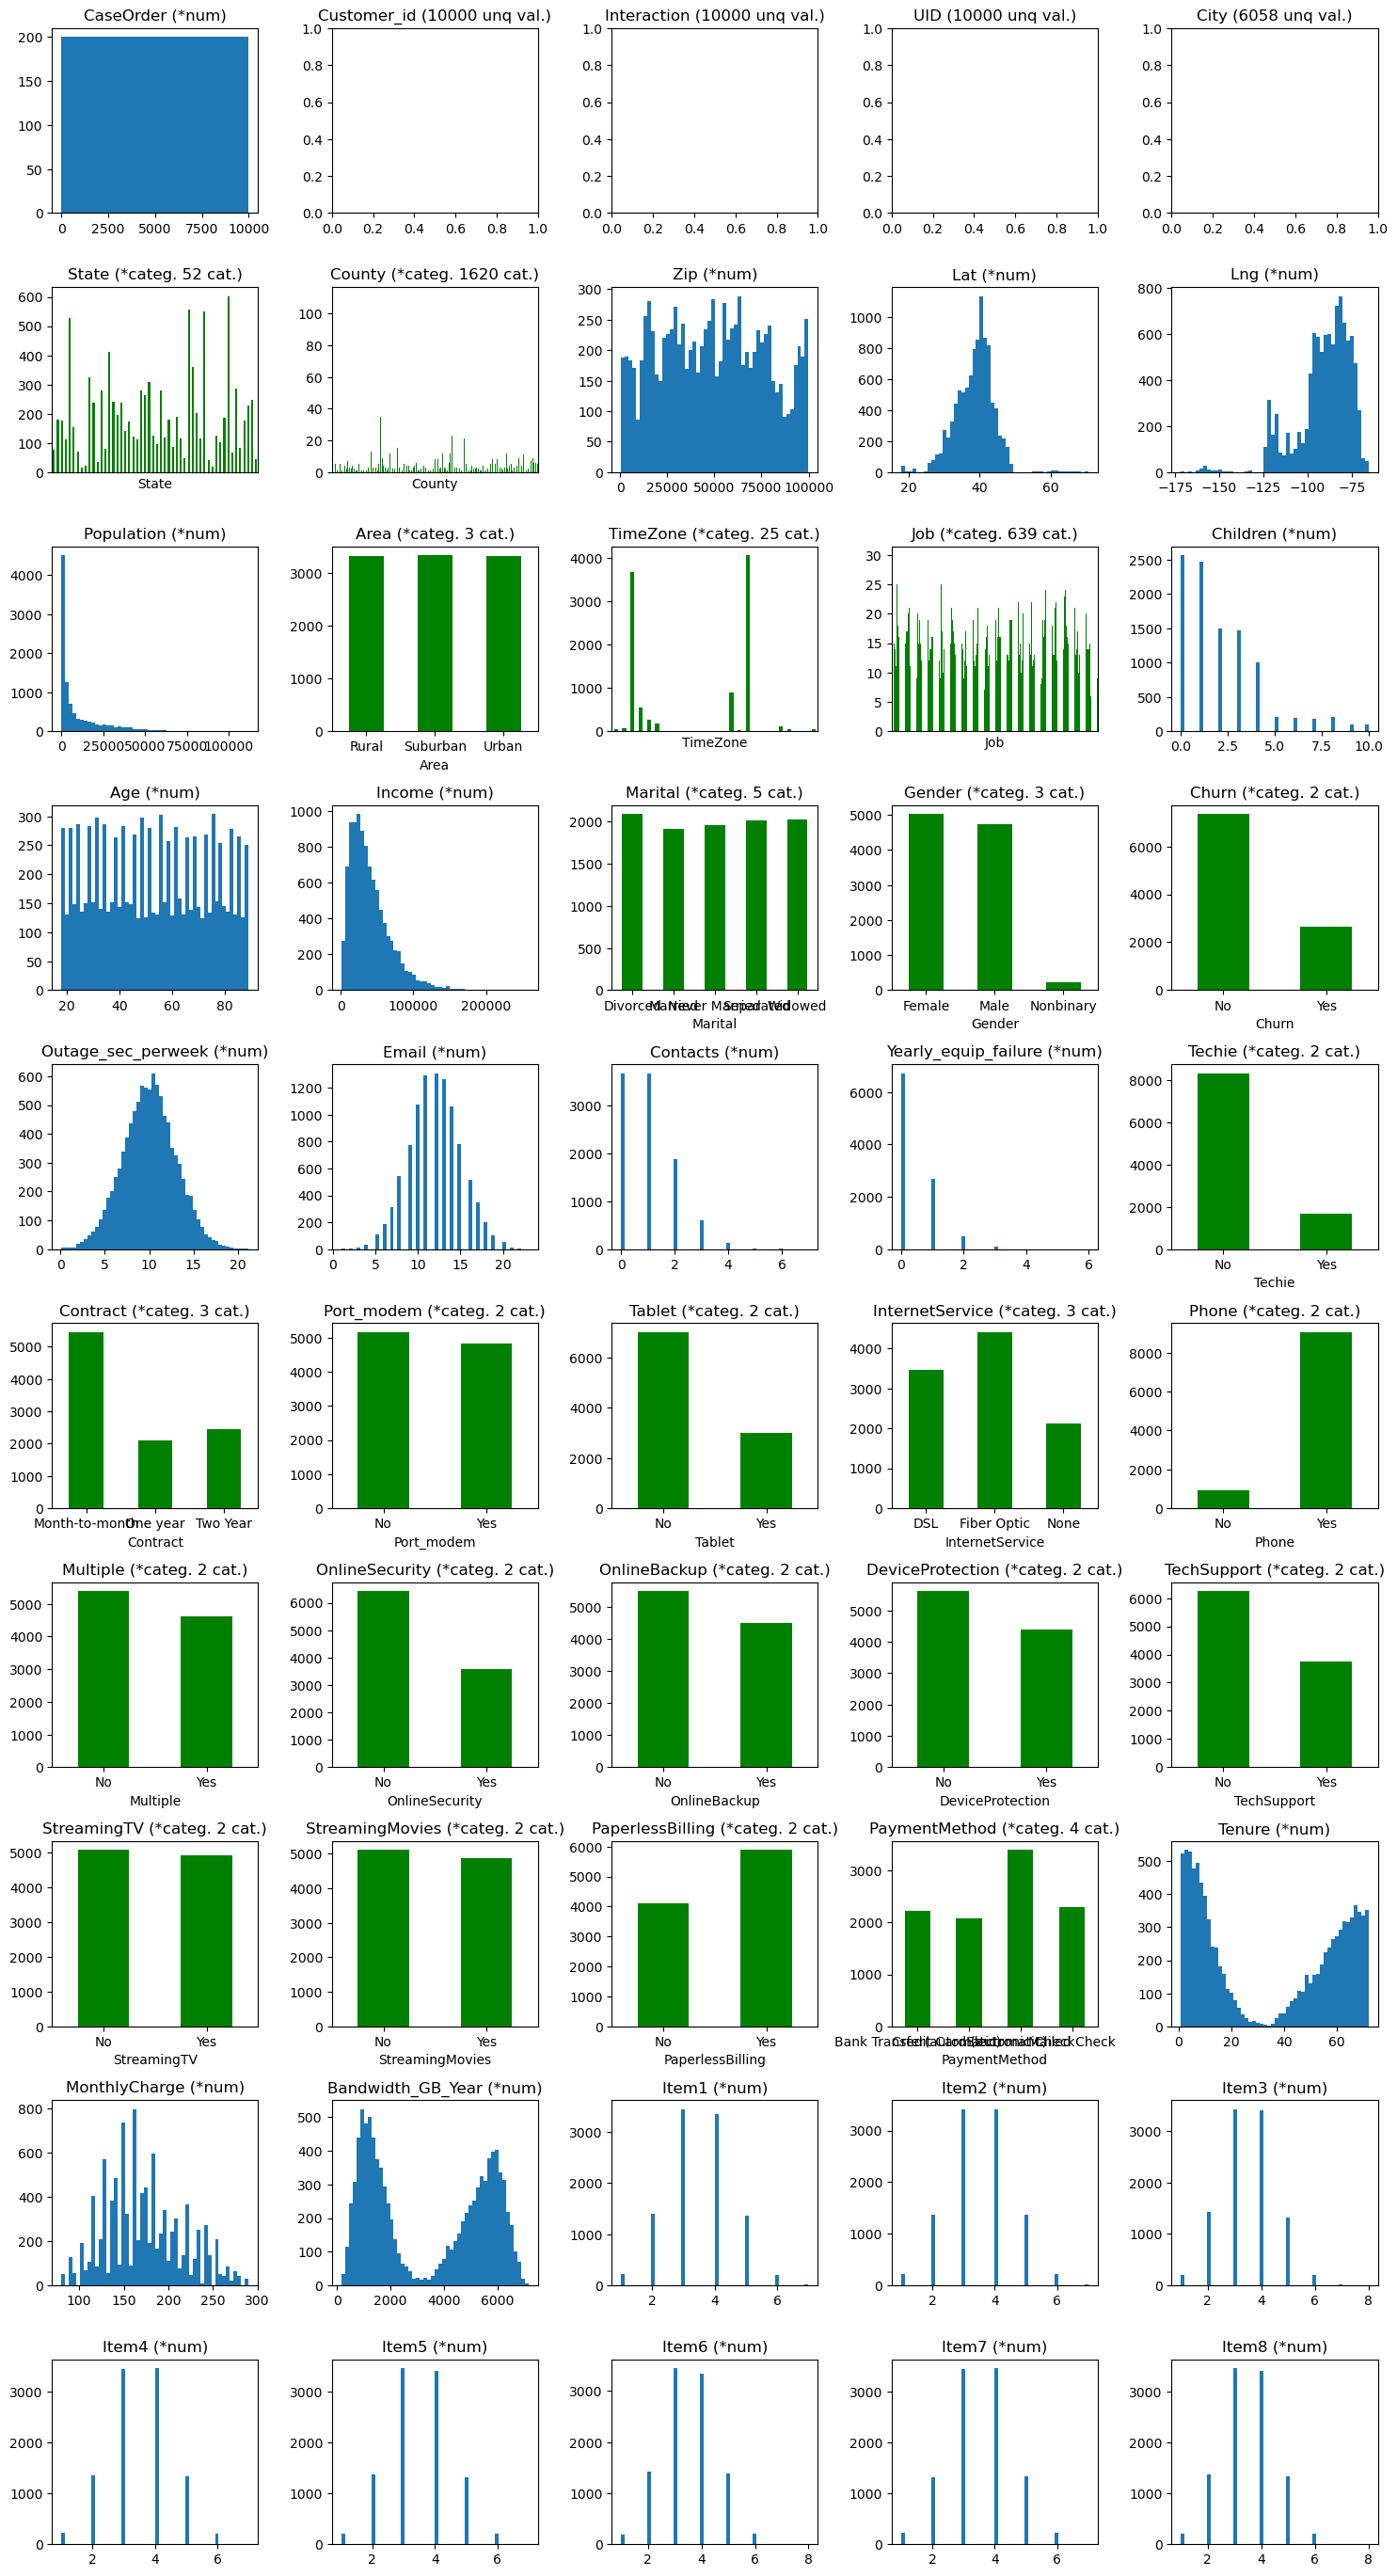

Wall time: 38.1 s


In [9]:
%%time
#calling the plt_summary to the Raw DataFrame
plt_summary(df_raw,"hist",target)

Number of columns:  50


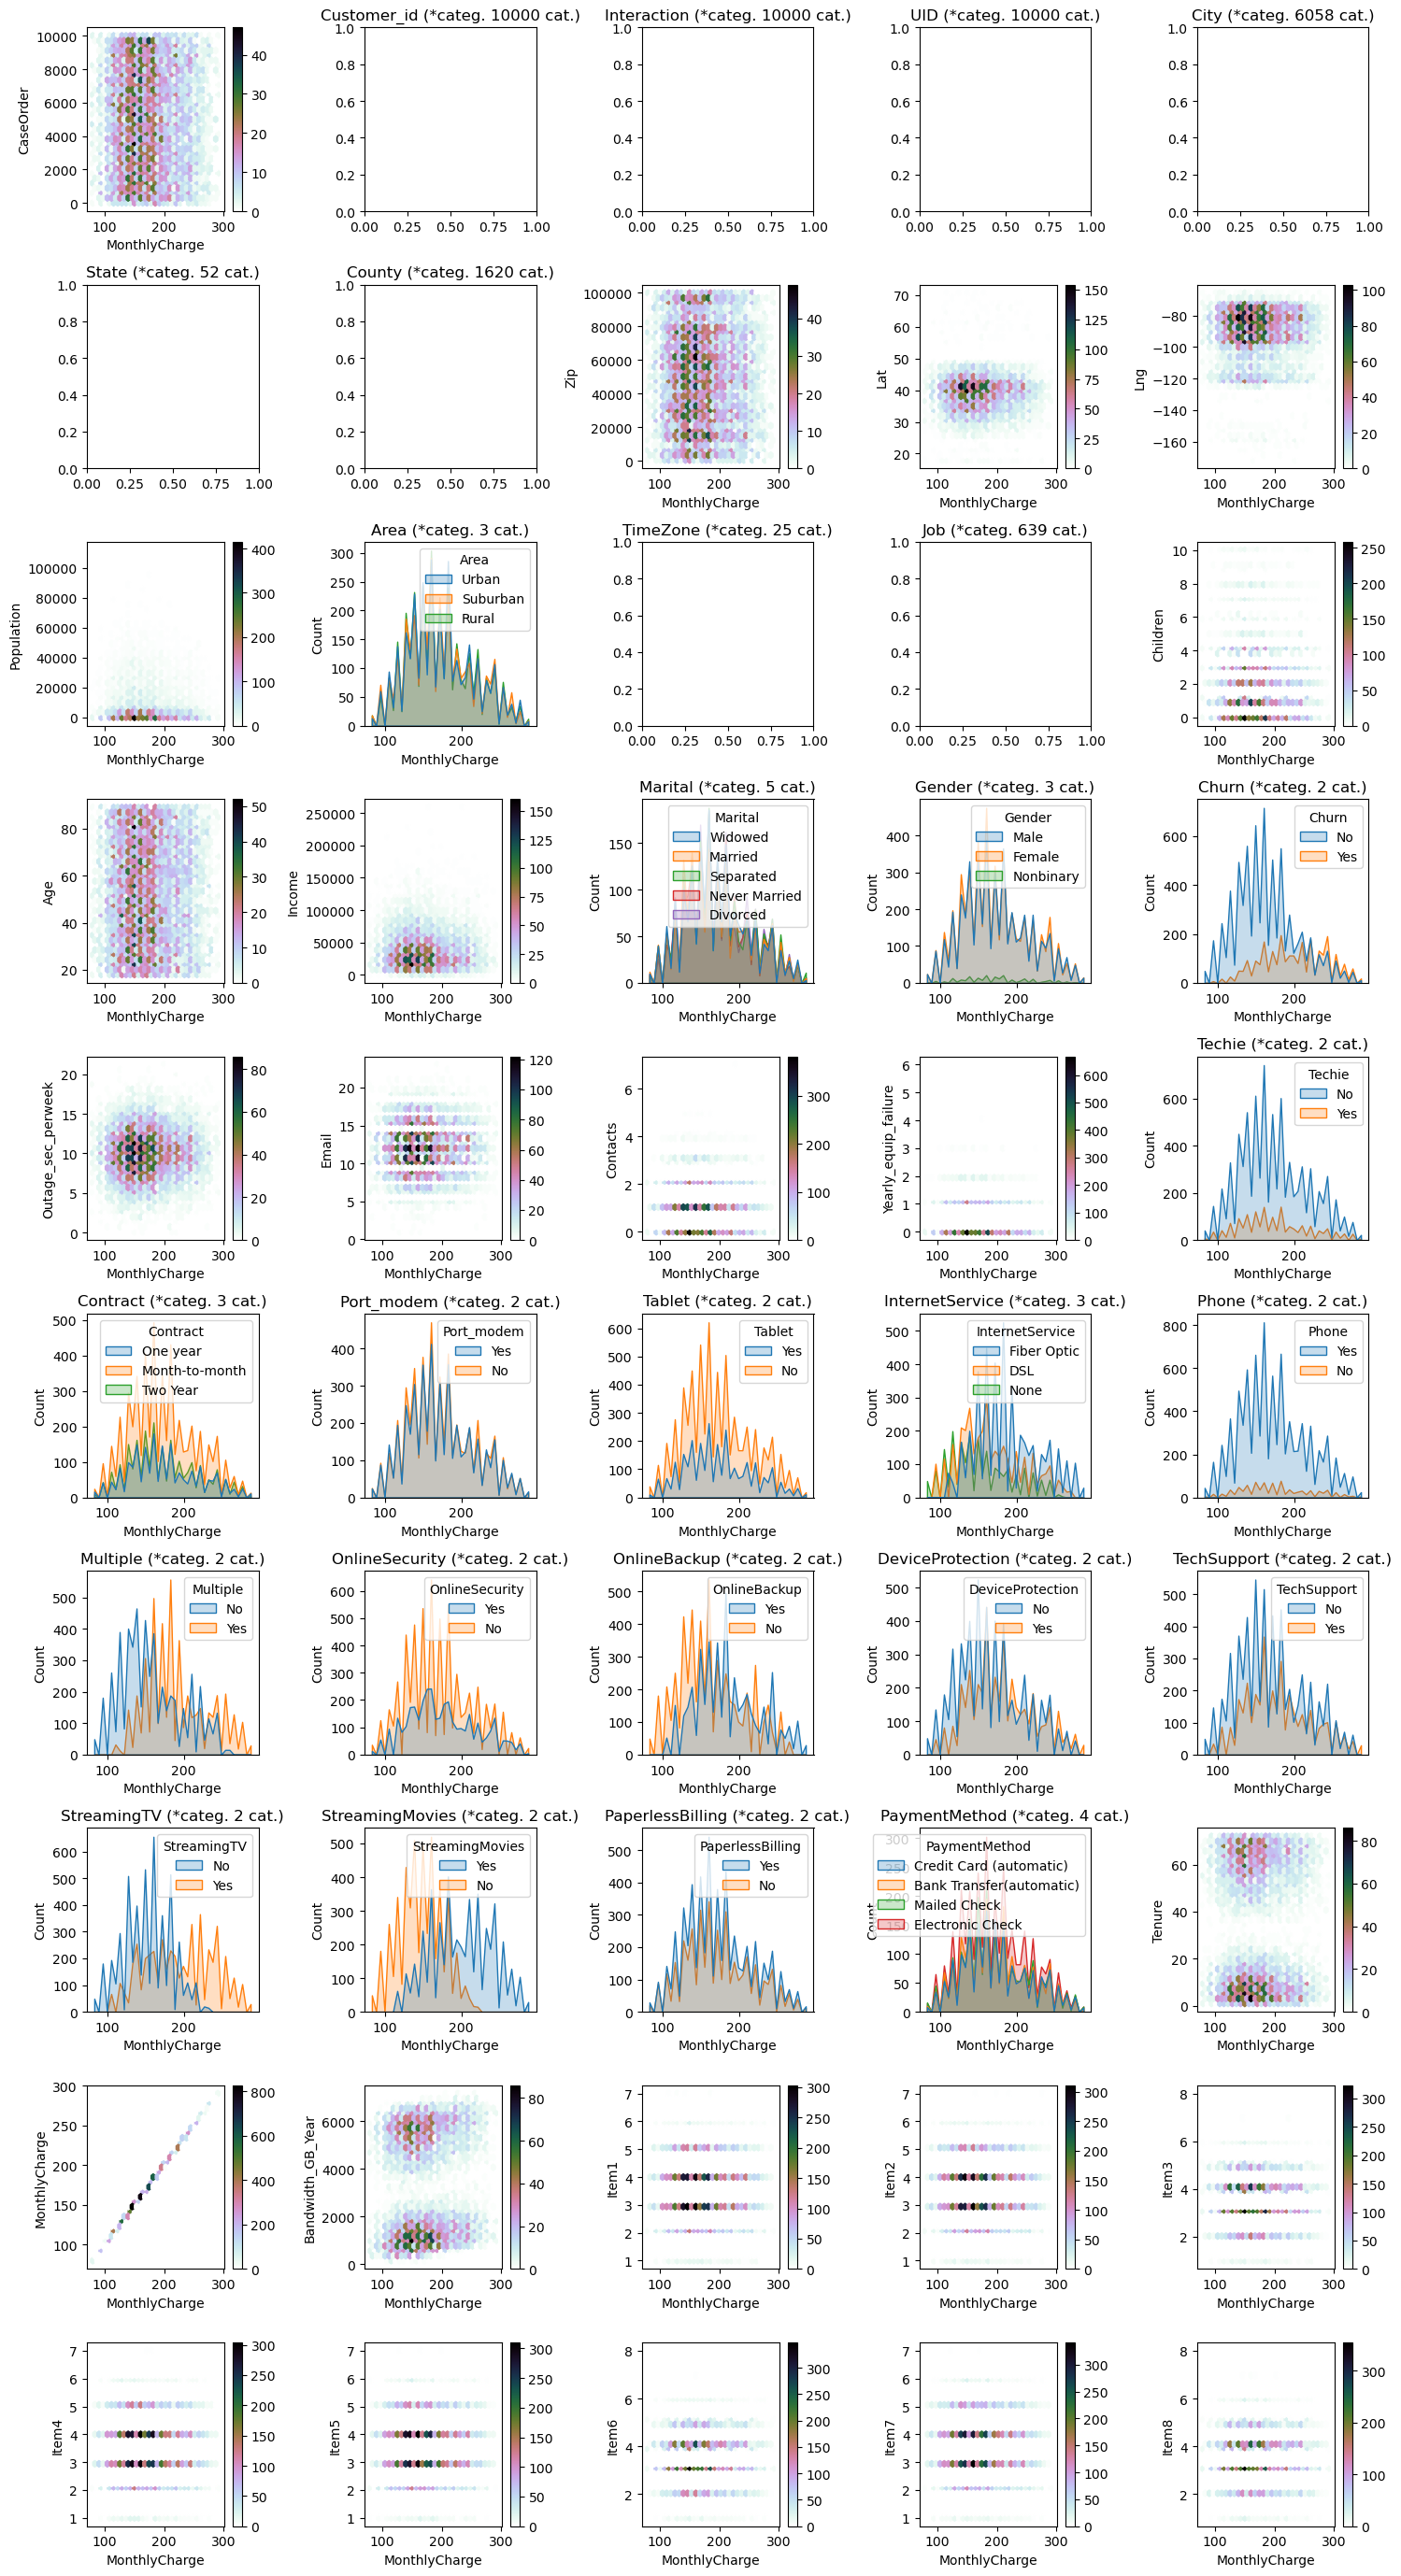

Wall time: 22.3 s


In [10]:
%%time
#calling the plt_summary to the Raw DataFrame
plt_summary(df_raw,"target_histplot",target)

Number of Numeric columns:  47


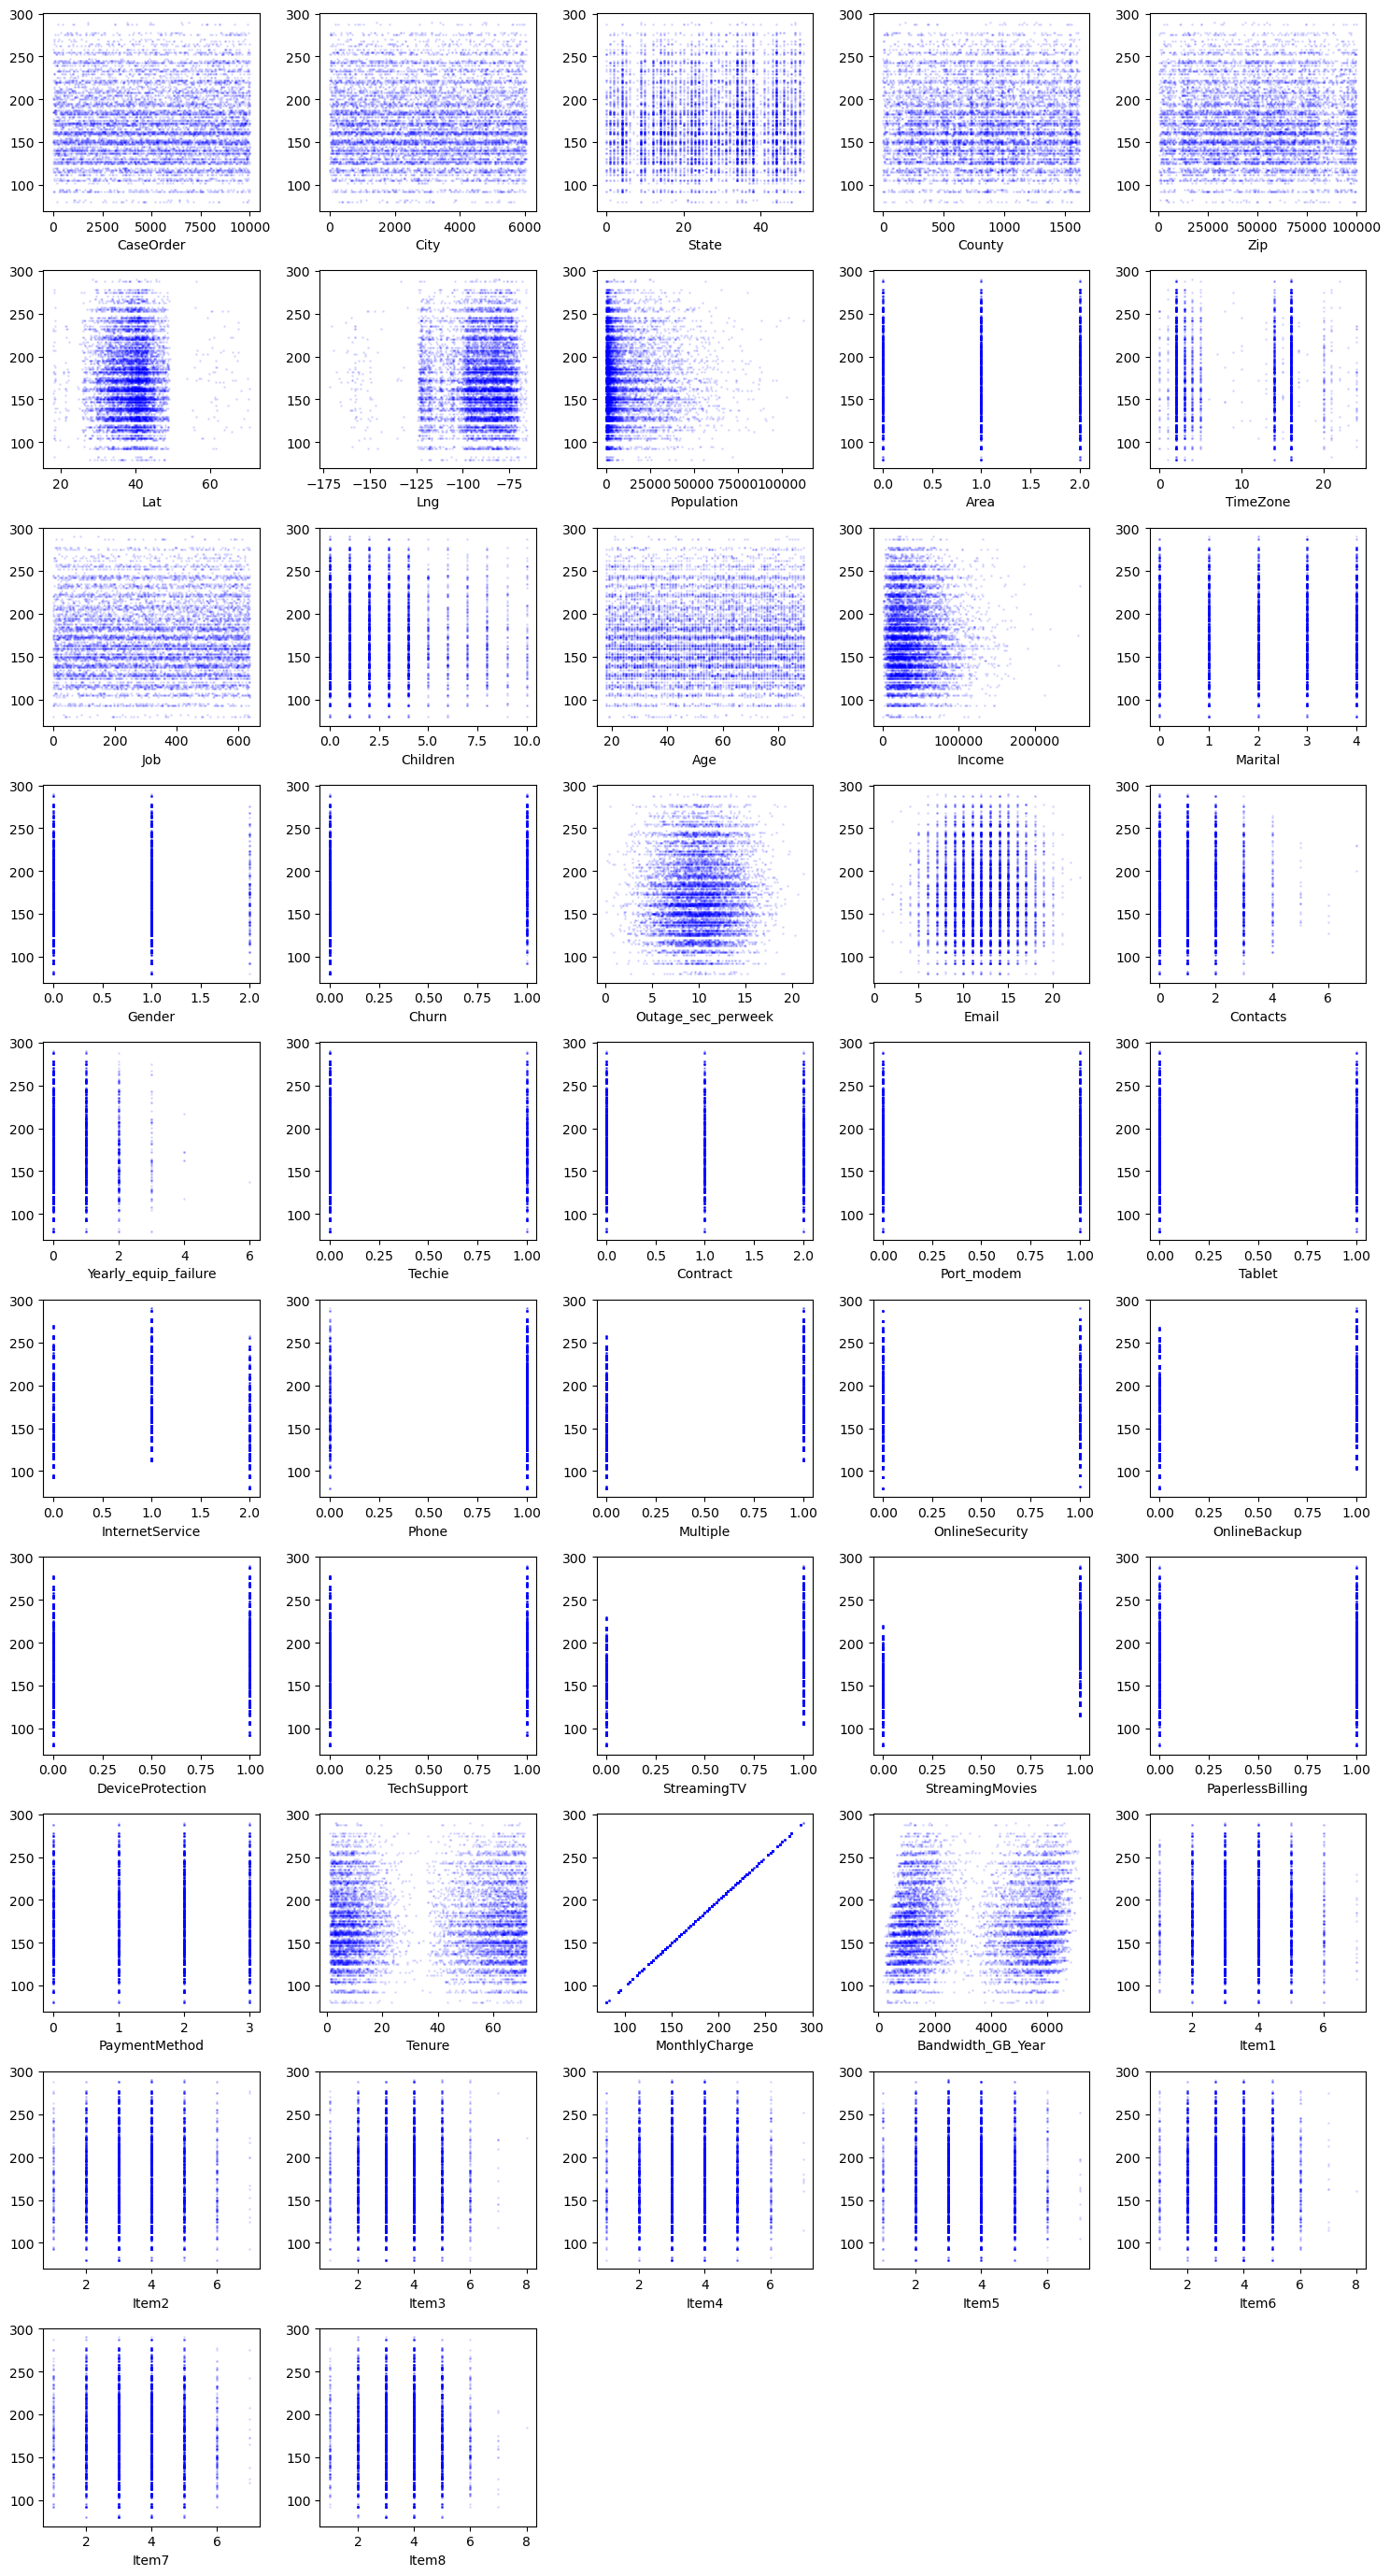

Wall time: 13.5 s


In [11]:
%%time
#calling the plt_summary to the num DataFrame
plt_summary(df_num,'target_scat',target)

#### Variables Correlation:

*Function plot_corr_ellipses() imported and modified From text Book "Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python",(Bruce et al.,2020) - The associated GitHub code repository 

https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

In [12]:
'''
From text Book "Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python"
The associated GitHub code repository 
'''

from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
        ax.grid (True, color = "grey", linewidth = "0.5", linestyle = "-")
    return ec


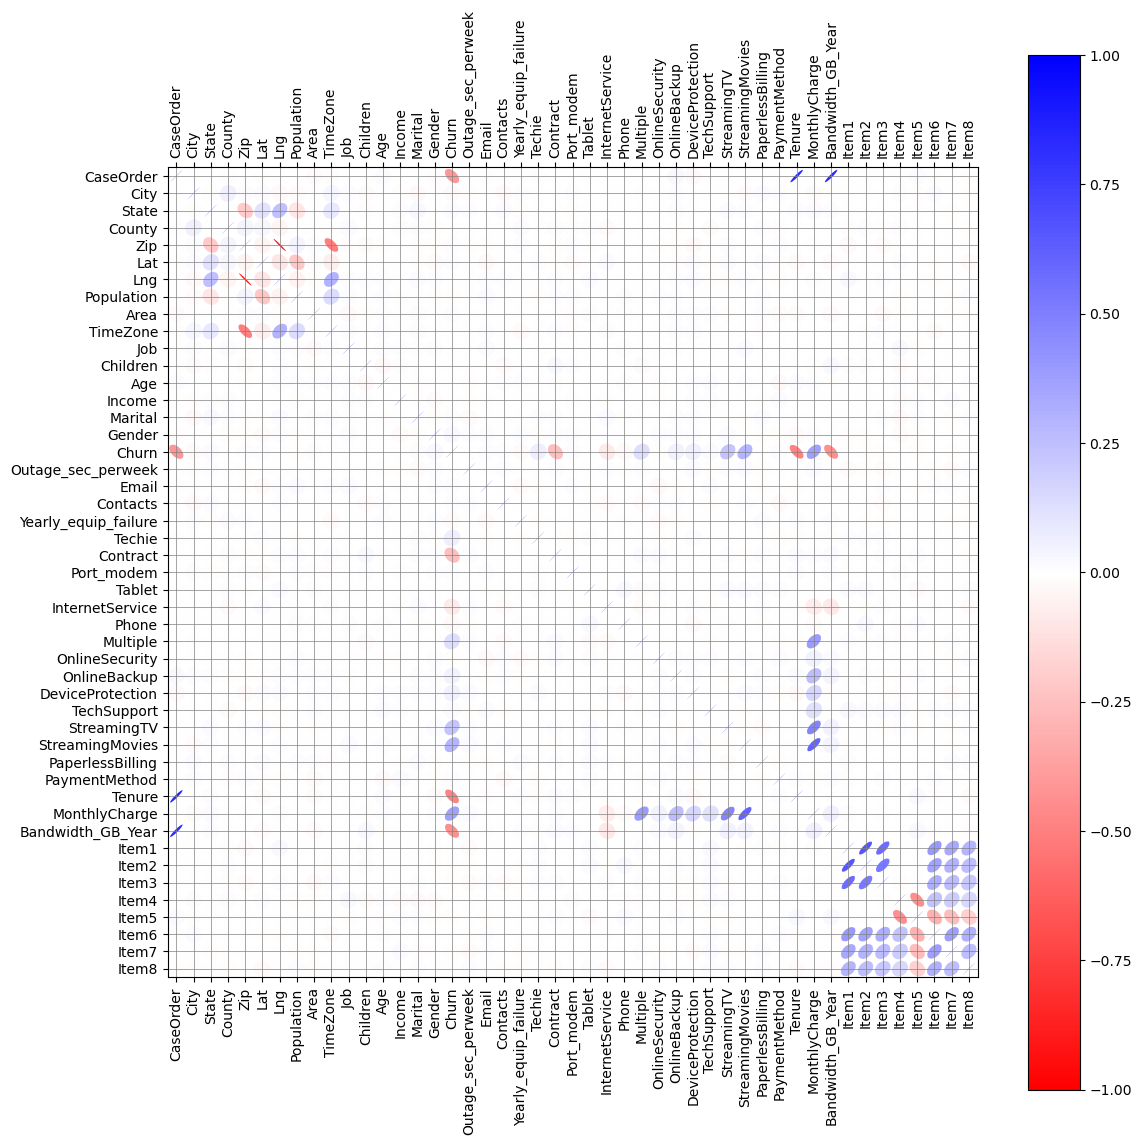

In [13]:
ax= plot_corr_ellipses(df_num.corr(), figsize=(12, 12), cmap='bwr_r')
plt.colorbar(ax)
plt.tight_layout()
plt.show()

##### PCA:

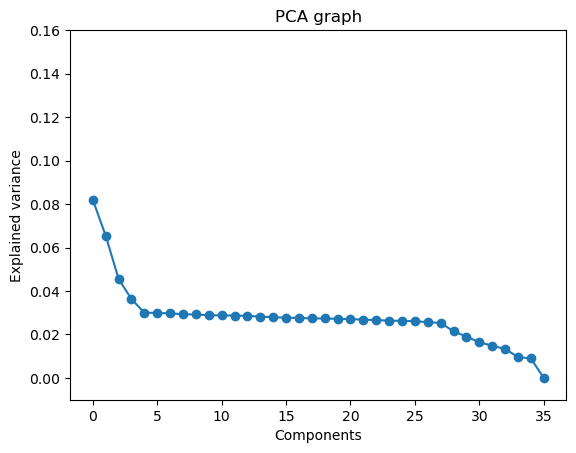

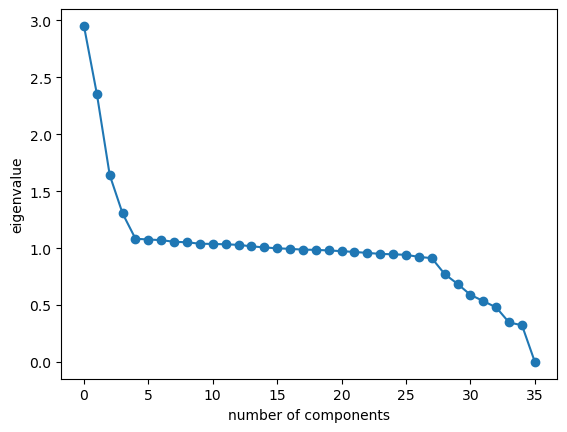

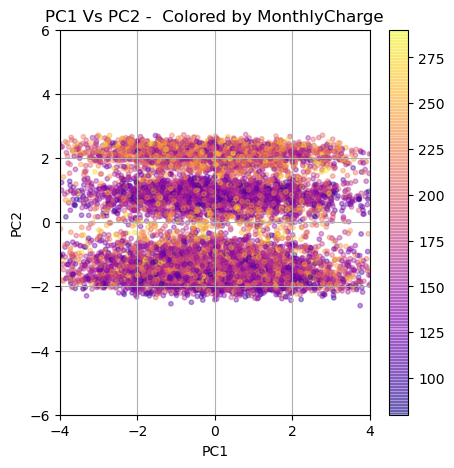

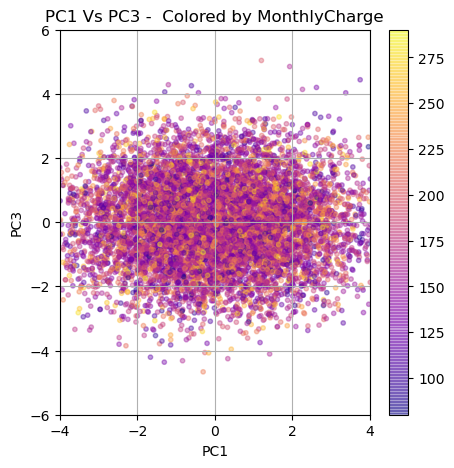

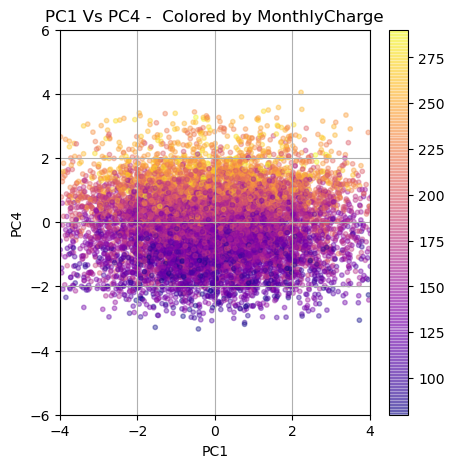

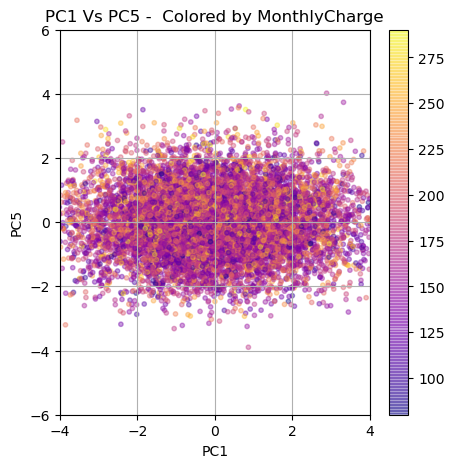

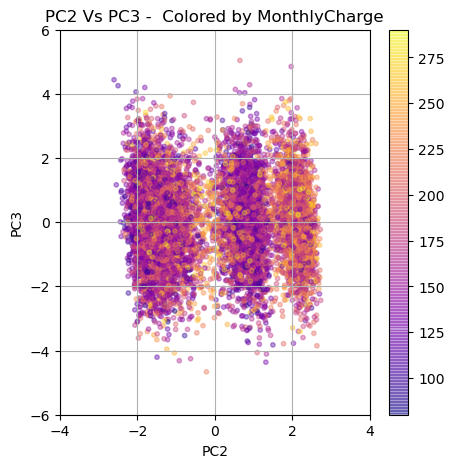

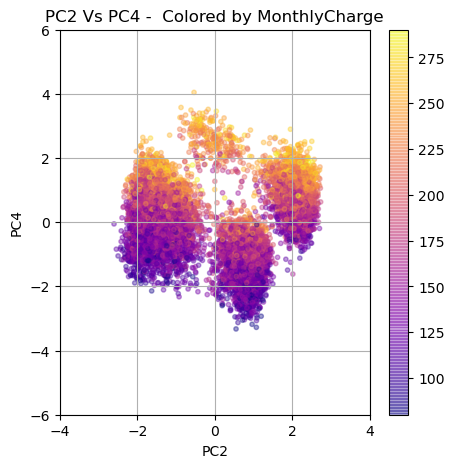

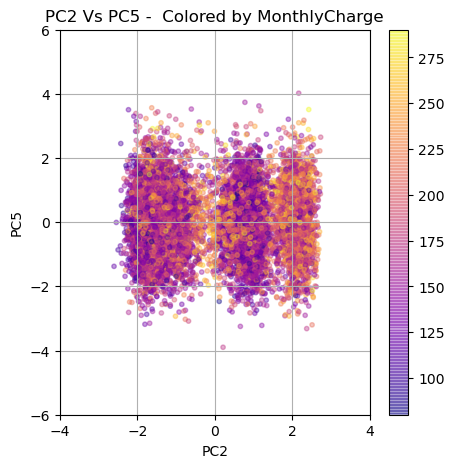

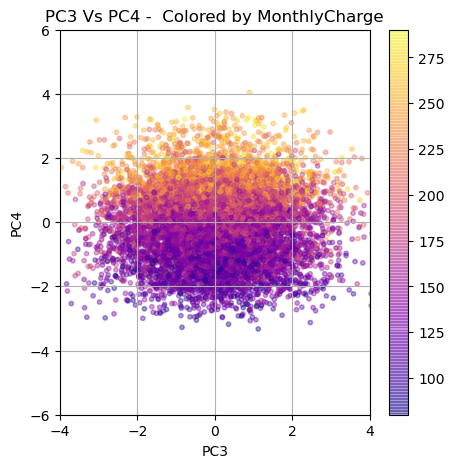

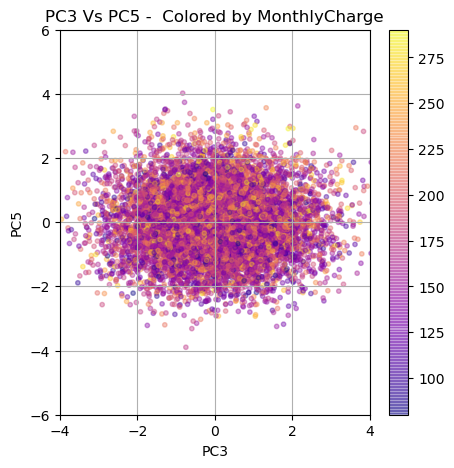

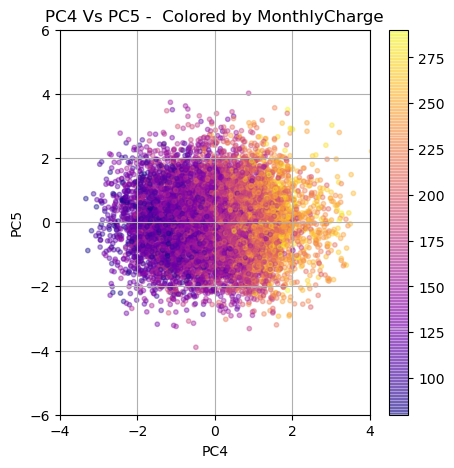

Sorted by: PC4


PC1       PC2       PC3       PC4       PC5  \
StreamingMovies       0.007581  0.082697  0.000262  0.491977  0.002869   
Churn                 0.000537  0.472526  0.021086  0.453897  0.021638   
StreamingTV           0.000721  0.054804  0.021328  0.379004  0.048627   
Contract              0.001501  0.104656  0.012788  0.331955  0.073190   
Bandwidth_GB_Year     0.017122  0.604936  0.034122  0.298680  0.015519   
InternetService       0.005008  0.018604  0.004100  0.238989  0.143924   
Tenure                0.016509  0.616323  0.035459  0.229876  0.000942   
Multiple              0.000615  0.046412  0.012442  0.199469  0.086160   
OnlineBackup          0.005257  0.010424  0.019389  0.136434  0.196916   
DeviceProtection      0.002858  0.038429  0.017635  0.112216  0.252082   
Techie                0.008094  0.031940  0.024185  0.091791  0.230510   
Phone                 0.005229  0.014443  0.035612  0.070828  0.205834   
Gender                0.006586  0.016673  0.006505  0.051472  0.175632   
Outage_sec_perweek    0.017846  0.000544  0.014935  0.044173  0.038536   
Contacts              0.009026  0.000290  0.010796  0.039768  0.182136   
Children              0.004048  0.014041  0.028746  0.035060  0.213805   
PaperlessBilling      0.005597  0.002064  0.007905  0.032583  0.298470   
Age                   0.006554  0.003151  0.029252  0.031991  0.281359   
Port_modem            0.000962  0.004563  0.013163  0.031367  0.165757   
Tablet                0.016434  0.002069  0.000784  0.026981  0.192129   
Job                   0.001049  0.001242  0.031493  0.022836  0.329722   
Item8                 0.308517  0.009701  0.131222  0.022130  0.044055   
Income                0.001292  0.001276  0.026129  0.021508  0.063252   
PaymentMethod         0.002023  0.004653  0.008694  0.016911  0.193016   
Item4                 0.145867  0.017667  0.568449  0.016728  0.009547   
OnlineSecurity        0.000666  0.015857  0.013712  0.016481  0.161994   
Marital               0.001546  0.000693  0.046799  0.014349  0.347844   
Item2                 0.433646  0.026643  0.282883  0.014344  0.019644   
Item7                 0.358071  0.007741  0.179488  0.012422  0.000581   
Item1                 0.458525  0.019237  0.280150  0.012252  0.013760   
Item5                 0.175640  0.035229  0.586517  0.008998  0.041244   
Item6                 0.404585  0.002234  0.182831  0.008509  0.003182   
TechSupport           0.024768  0.005585  0.008209  0.007814  0.139912   
Yearly_equip_failure  0.007599  0.016617  0.006955  0.006103  0.035001   
Email                 0.008849  0.018048  0.006949  0.002488  0.314679   
Item3                 0.400185  0.024294  0.280546  0.000229  0.019831   

                           PC6       PC7       PC8       PC9      PC10  \
StreamingMovies       0.188835  0.065912  0.274185  0.182115  0.132214   
Churn                 0.020594  0.035237  0.013911  0.009681  0.012497   
StreamingTV           0.125987  0.033771  0.216248  0.072362  0.378668   
Contract              0.371125  0.124409  0.025272  0.225599  0.206919   
Bandwidth_GB_Year     0.009020  0.011998  0.023268  0.013211  0.003469   
InternetService       0.076694  0.050604  0.072805  0.369122  0.021535   
Tenure                0.044834  0.000889  0.004767  0.046761  0.006589   
Multiple              0.030945  0.039666  0.183407  0.366510  0.270889   
OnlineBackup          0.012535  0.212697  0.100905  0.036075  0.300307   
DeviceProtection      0.094312  0.349931  0.091473  0.134959  0.153213   
Techie                0.274604  0.144086  0.057471  0.052782  0.139601   
Phone                 0.027407  0.213756  0.452829  0.095677  0.115040   
Gender                0.413557  0.090043  0.135460  0.007980  0.040148   
Outage_sec_perweek    0.382033  0.143953  0.000660  0.022539  0.019186   
Contacts              0.036704  0.378321  0.273111  0.169671  0.132915   
Children              0.285239  0.217991  0.183553  0.178764  0.113374   
PaperlessBilling      0.011140

PC4 Main contributors sorted:  

 StreamingMovies         0.491977
Churn                   0.453897
StreamingTV             0.379004
Contract                0.331955
Bandwidth_GB_Year       0.298680
InternetService         0.238989
Tenure                  0.229876
Multiple                0.199469
OnlineBackup            0.136434
DeviceProtection        0.112216
Techie                  0.091791
Phone                   0.070828
Gender                  0.051472
Outage_sec_perweek      0.044173
Contacts                0.039768
Children                0.035060
PaperlessBilling        0.032583
Age                     0.031991
Port_modem              0.031367
Tablet                  0.026981
Job                     0.022836
Item8                   0.022130
Income                  0.021508
PaymentMethod           0.016911
Item4                   0.016728
OnlineSecurity          0.016481
Marital                 0.014349
Item2                   0.014344
Item7                   0.012422
Item1    

In [14]:
#Principal Component Analysis

df_numpca =df_num.copy()

#Dropping target column
target = 'MonthlyCharge'
df_numpca.drop(columns=target,inplace=True)

#Dropping irrelevant columns
drop_cols = ['CaseOrder','City','State','County','Zip','Lng','Lat','Population','Area','TimeZone']
df_numpca.drop(columns=drop_cols,inplace=True)
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numpca = df_numpca.select_dtypes(include=numerics)

#Principal Component Analysis and plot
df_numpca_normalized=(df_numpca-df_numpca.mean())/df_numpca.std()
pca= PCA(n_components=df_numpca.shape[1])
pca.fit(df_numpca_normalized)
pca_names=['PC'+str(i) for i in range (1,len(df_numpca.columns)+1)]
df_numpca_pca=pd.DataFrame(pca.transform(df_numpca_normalized), columns = [*pca_names])

plt.plot(pca.explained_variance_ratio_,'o-')
plt.title('PCA graph')
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.ylim([-0.01,0.16])
#plt.xlim([-1,40])
plt.show()

#Eigenvalues and plot
cov_matrix= np.dot(df_numpca_normalized.T,df_numpca_normalized)/df_numpca.shape[0]
eigenvalues =[np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues,'o-')
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

#Loadings
loadings = pd.DataFrame(pca.components_.T,columns = [*pca_names],index=df_numpca.columns)
pca_xplots = [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]
for j,k in (pca_xplots):
    plt.figure(figsize=(5,5))
    plt.scatter(df_numpca_pca.iloc[:,j],df_numpca_pca.iloc[:,k],s=10,alpha=0.4,c=df_num.loc[:,target],cmap='plasma')
    plt.colorbar();plt.grid('on')
    plt.title(pca_names[j] +" Vs "+ pca_names[k]+" -  Colored by " + target );plt.xlabel(pca_names[j]);plt.ylabel(pca_names[k])
    plt.ylim([-0.01,0.16]);plt.ylim([-6,6]);plt.xlim([-4,4])
    plt.show()

PCsortingcomponent=4
print('Sorted by: '+ pca_names[PCsortingcomponent-1])
display(loadings.abs().sort_values(by=pca_names[PCsortingcomponent-1],ascending =False))
print(pca_names[PCsortingcomponent-1] +' Main contributors sorted:  \n\n',loadings.iloc[:,PCsortingcomponent-1].abs().sort_values(ascending =False))
#display(loadings.abs().sort_values(by=pca_names,ascending =False))

-----------------------------------------------------------------------------------------------------------------------

##### Conclusion of Data Exploration:

* The target variable (MonthlyCharge) isn't perfectly continuous, seems to be rounded at specific levels of monthly payments.
* The bivariate correlations between the variables and the target variable showed preliminarily the main features that can be used in target prediction through the MLR, this will be discussed later in the following sections.
* The correlation plot among all features revealed a high correlation among some features such as 'Tenure' and 'Bandwidth_GB_Year', this can be described as multicollinearity in the MLR model.
* There is an effect of 'CaseOrder' variable, which supposed to be the data index, it obviously has a high correlation with some variables ( 'Tenure', 'Bandwidth_GB_Year' and 'Churn')
* The PCA showed the PC4 is the most effective component of variation when it comes to the target variable, the variables contributed the most in PC4 are shown in the PCA results section, it is not the best way to determine the main features of regression, but it could give a preliminary overview.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part III: Data Preparation

#### C.  Summarize the data preparation process for multiple regression analysis by doing the following:

##### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

data preparation goals:
- Utilizing the categorical variables in the MLR, by converting them into numeric form, and by splitting them into dummy variables to use only the most relevant component out of them.
- Minimizing the effect of possible multicollinearity, by removing the variables with redundant information.
- Excluding the insignificant variables from the model, depending on the p-values.
- Applying the MLR model to the most relevant combination of features by removing irrelevant and redundant variables.
- Ensuring the fulfillment of the linear regression model assumptions.
- Standardization of input variables , for better comparisons of models results.

-------------------------------------------------------------------------------------------------------------------

##### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

+ Explained in "Exploring the Data" section. 

-------------------------------------------------------------------------------------------------------------------

##### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

- Converting categorical variables into numeric form (Done).
- Applying variance inflation factor test (VIF) and other tests to identify the variables with redundant information.
- Standardization of input variables.
- Excluding the insignificant variables from the model, by iterating the modelling process with enhancement.
- Ensuring the residual values and distribution.

-------------------------------------------------------------------------------------------------------------------

##### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

+ Explained in "Exploring the Data" section.

### Preparing for a Test model

In [15]:
# selecting only the numeric columns
numerics = ['uint8','uint32','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_only = df_raw.select_dtypes(include=numerics)  # selecting only the numeric columns

Standardization of numeric variables 

In [16]:
# Standardization of numeric variables 
target='MonthlyCharge'
df_num_only_std=(df_num_only-df_num_only.mean())/df_num_only.std()
mlr_df=df_num_only_std.copy()

Initializing Test model

In [17]:
X=mlr_df.copy()

# adding categorical columns excluded earlier 
catcols=[coln for coln in list(df_raw.columns) if coln not in list(X.columns)]
X[catcols]=df_raw.loc[:,catcols]

X=cat2num(X) # To be able to correlate the categorical variables
X= X.select_dtypes(include=numerics)  # removing the non-numeric columns
X=X.drop([target],axis=1) #dropping te target column from the predictors data set

X = sm.add_constant(X) #adding constant that will represent the intercept of the MLR model

y = mlr_df[target] # assigning the target to vector y

In [18]:
# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30)

In [19]:
%%time
# MLR implementation
linear_regression = sm.OLS(y_train,X_train)
fitted_model = linear_regression.fit()

residuals =fitted_model.predict(X_test)-y_test
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1840.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:50:16   Log-Likelihood:                -849.64
No. Observations:                7000   AIC:                             1793.
Df Residuals:                    6953   BIC:                             2115.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.2446 

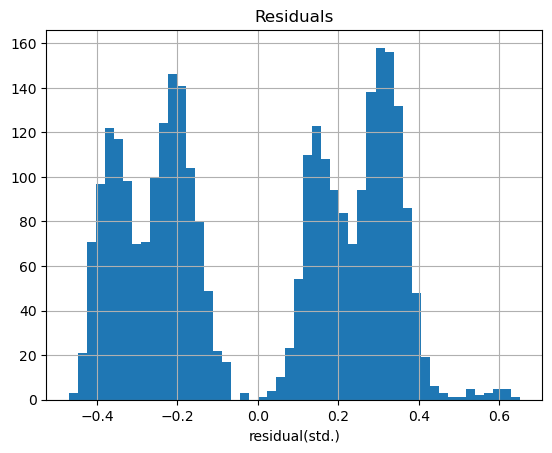

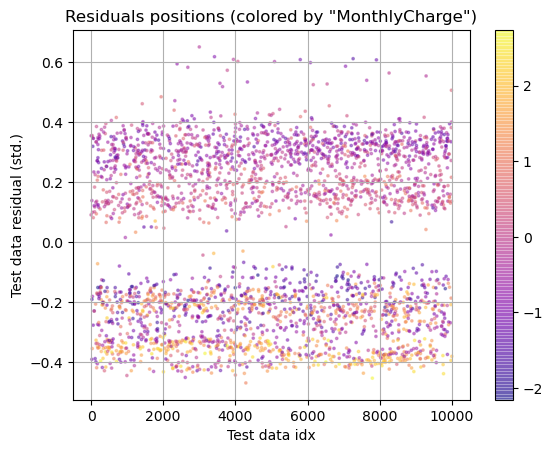

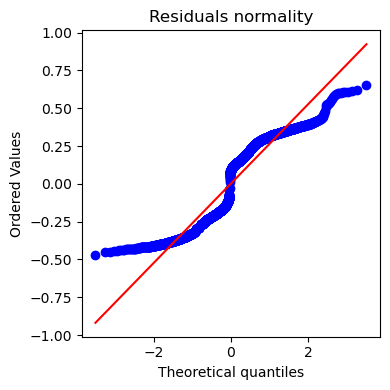

In [20]:
# MLR examination plots
residuals.hist(bins = 50)
plt.title('Residuals')
plt.xlabel('residual(std.)')
plt.show()

plt.scatter(X_test.index,residuals,s=3,alpha=0.4,c=y_test,cmap='plasma')
plt.title('Residuals positions (colored by "'+ target+'")');plt.xlabel('Test data idx');plt.ylabel('Test data residual (std.)')
plt.colorbar();plt.grid('on')
plt.show()

# QQ-Plot
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(residuals, plot=ax) # QQ-Plot
plt.title('Residuals normality')
plt.tight_layout()
plt.show()

In [21]:
fitted_model.pvalues.sort_values(ascending=True)

const                    0.000000e+00
InternetService          0.000000e+00
Multiple                 0.000000e+00
Bandwidth_GB_Year        0.000000e+00
OnlineBackup             0.000000e+00
DeviceProtection         0.000000e+00
Tenure                   0.000000e+00
StreamingMovies          0.000000e+00
TechSupport              0.000000e+00
StreamingTV              0.000000e+00
Age                     6.163214e-285
Children                1.268647e-280
OnlineSecurity          5.201959e-214
Gender                   1.478644e-56
Churn                    1.691906e-18
Contract                 5.786299e-04
Item2                    3.801865e-02
Techie                   7.318178e-02
Tablet                   1.129592e-01
Population               1.789391e-01
PaperlessBilling         2.276264e-01
Port_modem               2.514822e-01
Email                    2.850736e-01
Lat                      2.954272e-01
Yearly_equip_failure     3.396475e-01
Item3                    3.596141e-01
Phone       

In [22]:
signific=0.05
test_significant_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value <signific]
test_nonsign_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value >=signific]
print('test Significant columns: \n',test_significant_columns)
print('\n test Non Significant columns: \n',test_nonsign_columns)

test Significant columns: 
 ['const', 'Children', 'Age', 'Tenure', 'Bandwidth_GB_Year', 'Item2', 'Gender', 'Churn', 'Contract', 'InternetService', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

 test Non Significant columns: 
 ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'PaperlessBilling', 'PaymentMethod']


###### Applying variance inflation factor test (VIF)

In [23]:
X_temp=X.copy()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.values.shape[1])]
vif["features"] = X_temp.columns
print(vif.round(1).sort_values(by="VIF Factor",ascending=False))

    VIF Factor              features
14       422.2     Bandwidth_GB_Year
13       420.6                Tenure
0         45.8                 const
2          9.4                   Zip
4          7.9                   Lng
36         3.5       InternetService
1          3.3             CaseOrder
43         2.2           StreamingTV
15         2.2                 Item1
44         2.1       StreamingMovies
31         1.9                 Churn
16         1.9                 Item2
27         1.8              TimeZone
17         1.6                 Item3
20         1.5                 Item6
6          1.4              Children
19         1.4                 Item5
7          1.4                   Age
3          1.3                   Lat
18         1.3                 Item4
21         1.3                 Item7
41         1.2      DeviceProtection
22         1.2                 Item8
40         1.2          OnlineBackup
5          1.1            Population
30         1.1                Gender
3

In [24]:
X_temp=X.copy()
droplist=['Bandwidth_GB_Year','Item2','Gender'] # list of features to remove based on VIF and modelling iterations
X_temp=X_temp.drop(droplist,axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.values.shape[1])]
vif["features"] = X_temp.columns
print(vif.round(1).sort_values(by="VIF Factor",ascending=False))

    VIF Factor              features
0         41.6                 const
2          9.4                   Zip
4          7.9                   Lng
13         3.7                Tenure
1          3.3             CaseOrder
28         1.9                 Churn
14         1.8                 Item1
25         1.8              TimeZone
18         1.5                 Item6
15         1.5                 Item3
17         1.4                 Item5
19         1.3                 Item7
3          1.3                   Lat
16         1.3                 Item4
20         1.2                 Item8
41         1.2       StreamingMovies
30         1.1              Contract
40         1.1           StreamingTV
22         1.1                 State
5          1.1            Population
12         1.0  Yearly_equip_failure
32         1.0                Tablet
42         1.0      PaperlessBilling
6          1.0              Children
39         1.0           TechSupport
38         1.0      DeviceProtection
3

In [25]:
test_nonsign_columns.extend(droplist)
test_significant_columns = [col for col in test_significant_columns if col not in test_nonsign_columns]
print('test Significant columns: \n',test_significant_columns)
print('\n test Non Significant columns: \n',test_nonsign_columns)

test Significant columns: 
 ['const', 'Children', 'Age', 'Tenure', 'Churn', 'Contract', 'InternetService', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

 test Non Significant columns: 
 ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'PaperlessBilling', 'PaymentMethod', 'Bandwidth_GB_Year', 'Item2', 'Gender']


-----------------------------------------------------------------------------------------------------------------

##### 5. Provide a copy of the prepared data set.

Right in the next section.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part IV: Model Comparison and Analysis

#### D.  Compare an initial and a reduced multiple regression model by doing the following:

1.  Construct an initial multiple regression model from all predictors that were identified in Part C2.

#### Initial model

In [26]:
%%time
# initializing the model
X=mlr_df.copy()

# adding categorical columns excluded earlier 
catcols=[coln for coln in list(df_raw.columns) if coln not in list(X.columns)]
X[catcols]=df_raw.loc[:,catcols]
X=cat2num(X) # To be able to correlate the categorical variables
X= X.select_dtypes(include=numerics)  # removing the non-numeric columns

X=X.drop(test_nonsign_columns,axis=1) #dropping non significant columns from the predictors data set
X=X.drop([target],axis=1) #dropping the target column from the predictors data set
X = sm.add_constant(X) #adding constant that will represent the intercept of the MLR model
y = mlr_df[target] # assigning the target to vector y

Wall time: 8.73 s


##### Saving a copy of the prepared data set.

In [27]:
# Saving a copy of the prepared data set.
D208_t1_input=X.copy()
D208_t1_input['data-MontlyCharge']=y
D208_t1_input.to_csv('D208_t1_model_input.csv', index = False)

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     3580.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:52:28   Log-Likelihood:                -2840.6
No. Observations:                7000   AIC:                             5709.
Df Residuals:                    6986   BIC:                             5805.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8654      0.013  

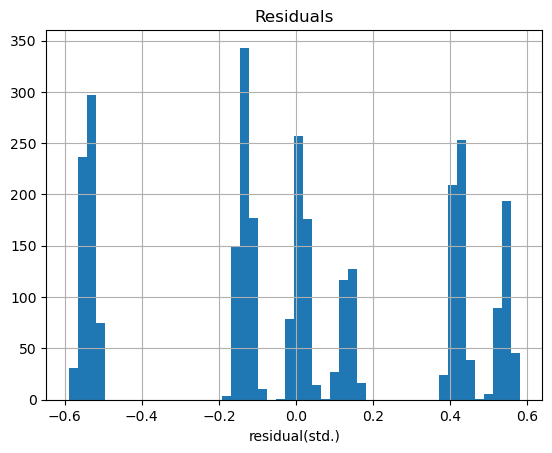

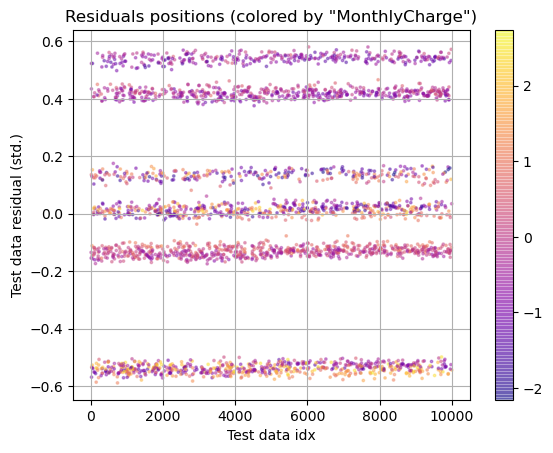

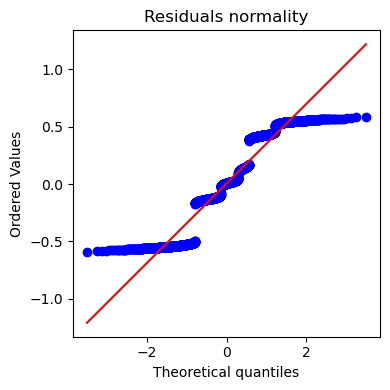

In [28]:
# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30)

# MLR implementation
linear_regression = sm.OLS(y_train,X_train)
fitted_model = linear_regression.fit()
residuals =fitted_model.predict(X_test)-y_test

# MLR summary:
print(fitted_model.summary())

# MLR examination plots
residuals.hist(bins = 50)
plt.title('Residuals')
plt.xlabel('residual(std.)')
plt.show()

plt.scatter(X_test.index,residuals,s=3,alpha=0.4,c=y_test,cmap='plasma')
plt.title('Residuals positions (colored by "'+ target+'")');plt.xlabel('Test data idx');plt.ylabel('Test data residual (std.)')
plt.colorbar();plt.grid('on')
plt.show()

# QQ-Plot
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(residuals, plot=ax) # QQ-Plot
plt.title('Residuals normality')
plt.tight_layout()
plt.show()

##### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

Mainly based on statistical significance (P>|t|) value, with significance limit= 0.05 , the variables with P-value less than 0.05 represnt the rejection of the null hypthesis , mening that these variables are significant and relevant to the research question (prediction of MonthlyCharge).
variables with with P-value larger than 0.05 represent failure to reject the null hypthesis meaning that the probability of giving them 0 coeeficient (or excluding them from the model) can be a relevant decesion.


##### 3.  Provide a reduced multiple regression model that includes both categorical and continuous variables.
Note: The output should include a screenshot of each model.

In [29]:
signific=0.05
initial_significant_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value <signific]
initial_nonsign_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value >=signific]
print('initial Significant columns: \n',initial_significant_columns)
print('\n initial Non Significant columns: \n',initial_nonsign_columns)

initial Significant columns: 
 ['const', 'Churn', 'InternetService', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

 initial Non Significant columns: 
 ['Children', 'Age', 'Tenure', 'Contract']


In [30]:
initial_nonsign_columns.extend(test_nonsign_columns)
print('initial Significant columns: \n',initial_significant_columns)
print('\n initial Non Significant columns: \n',initial_nonsign_columns)

initial Significant columns: 
 ['const', 'Churn', 'InternetService', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

 initial Non Significant columns: 
 ['Children', 'Age', 'Tenure', 'Contract', 'CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'PaperlessBilling', 'PaymentMethod', 'Bandwidth_GB_Year', 'Item2', 'Gender']


#### Reduced model

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.595e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:53:03   Log-Likelihood:                 1209.2
No. Observations:                7000   AIC:                            -2396.
Df Residuals:                    6989   BIC:                            -2321.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

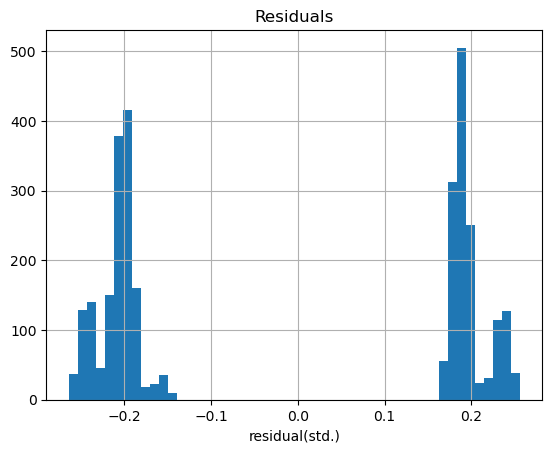

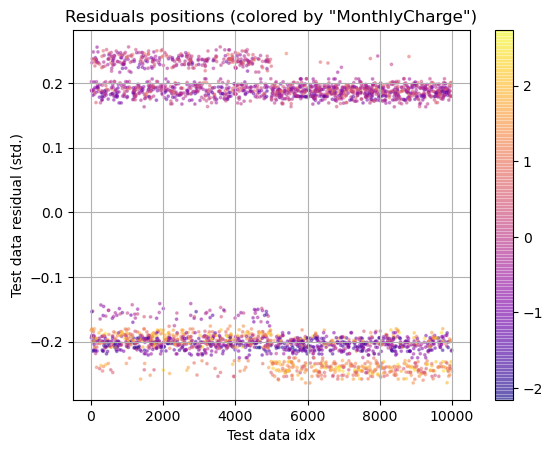

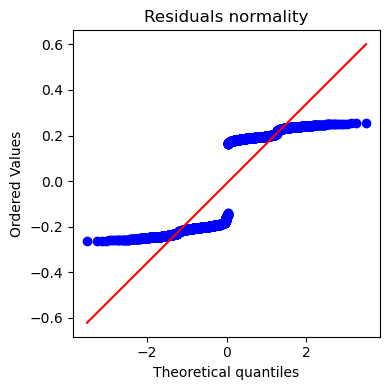

Wall time: 1.66 s


In [31]:
%%time
# initializing the model
X=mlr_df.copy()

# adding categorical columns excluded earlier 
catcols=[coln for coln in list(df_raw.columns) if coln not in list(X.columns)]
X[catcols]=df_raw.loc[:,catcols]
X = sm.add_constant(X) #adding constant that will represent the intercept of the MLR model

X=X[initial_significant_columns] #dropping nonsignificant columns from the predictors data set
#X=X.drop([target],axis=1) #dropping te target column from the predictors data set

# Adding dummy variables
dummy_cols = [dummy for dummy in categ_variables if dummy in X.columns]
X=pd.get_dummies(X,drop_first=True,columns=dummy_cols)

X=cat2num(X) # To be able to correlate the categorical variables
X= X.select_dtypes(include=numerics)  # removing the non-numeric columns


y = mlr_df[target] # assigning the target to vector y


# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30)

# MLR implementation
linear_regression = sm.OLS(y_train,X_train)
fitted_model = linear_regression.fit()
residuals =fitted_model.predict(X_test)-y_test

# MLR summary:
print(fitted_model.summary())

# MLR examination plots
residuals.hist(bins = 50)
plt.title('Residuals')
plt.xlabel('residual(std.)')
plt.show()

plt.scatter(X_test.index,residuals,s=3,alpha=0.4,c=y_test,cmap='plasma')
plt.title('Residuals positions (colored by "'+ target+'")');plt.xlabel('Test data idx');plt.ylabel('Test data residual (std.)')
plt.colorbar();plt.grid('on')
plt.show()

# QQ-Plot
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(residuals, plot=ax) # QQ-Plot
plt.title('Residuals normality')
plt.tight_layout()
plt.show()

##### Final model
The model applied to unstandardized variables, for more interpretable results

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.618e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:53:41   Log-Likelihood:                -25108.
No. Observations:                7000   AIC:                         5.024e+04
Df Residuals:                    6989   BIC:                         5.031e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

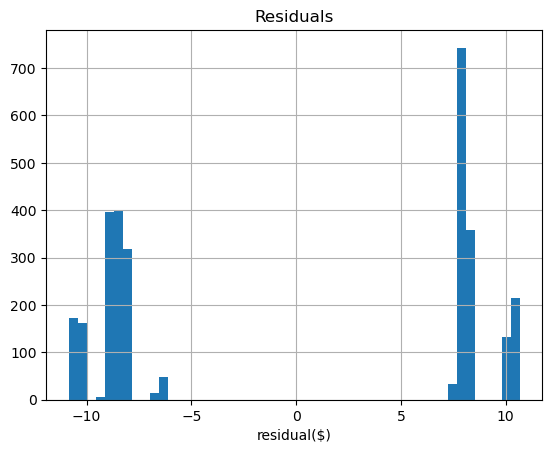

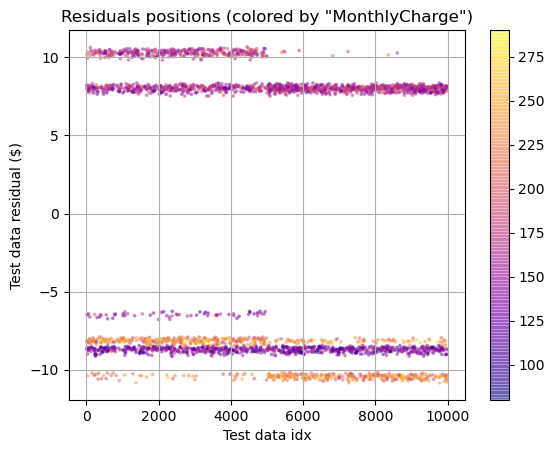

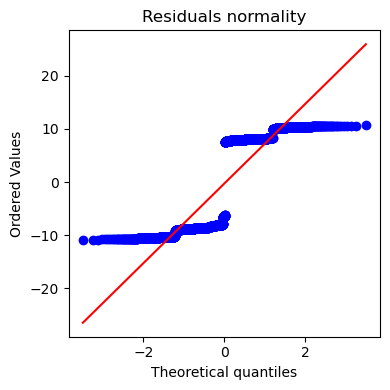

Wall time: 1.96 s


In [32]:
%%time

# No Standardization
mlr_df=df_num_only.copy()

# initializing the model
X=mlr_df.copy()

# adding categorical columns excluded earlier 
catcols=[coln for coln in list(df_raw.columns) if coln not in list(X.columns)]
X[catcols]=df_raw.loc[:,catcols]
X = sm.add_constant(X) #adding constant that will represent the intercept of the MLR model

X=X[initial_significant_columns] #dropping nonsignificant columns from the predictors data set
#X=X.drop([target],axis=1) #dropping te target column from the predictors data set

# Adding dummy variables
dummy_cols = [dummy for dummy in categ_variables if dummy in X.columns]
X=pd.get_dummies(X,drop_first=True,columns=dummy_cols)

X=cat2num(X) # To be able to correlate the categorical variables
X= X.select_dtypes(include=numerics)  # removing the non-numeric columns


y = mlr_df[target] # assigning the target to vector y


# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30)

# MLR implementation
linear_regression = sm.OLS(y_train,X_train)
fitted_model = linear_regression.fit()
residuals =fitted_model.predict(X_test)-y_test

# MLR summary:
print(fitted_model.summary())

# MLR examination plots
residuals.hist(bins = 50)
plt.title('Residuals')
plt.xlabel('residual($)')
plt.show()

plt.scatter(X_test.index,residuals,s=3,alpha=0.4,c=y_test,cmap='plasma')
plt.title('Residuals positions (colored by "'+ target+'")');plt.xlabel('Test data idx');plt.ylabel('Test data residual ($)')
plt.colorbar();plt.grid('on')
plt.show()

# QQ-Plot
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(residuals, plot=ax) # QQ-Plot
plt.title('Residuals normality')
plt.tight_layout()
plt.show()

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### E.  Analyze the data set using your reduced multiple regression model by doing the following:

##### 1. Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:

##### •  the logic of the variable selection technique

Mainly based on statistical significance (P>|t|) value, with significance limit= 0.05 , the variables with P-value less than 0.05 represnt the rejection of the null hypthesis , mening that these variables are significant and relevant to the research question (prediction of MonthlyCharge).
variables with with P-value larger than 0.05 represent failure to reject the null hypthesis meaning that the probability of giving them 0 coeeficient (or excluding them from the model) can be a relevant decesion.

The final set of variables has been chosen based on sequential iterations, by running several models, eliminating non-significant features, then rerunning the model again and so on, until reaching the final model,  not all the runs were included in this notebook (this notebook includes only a test model, initial model and a final reduced model).

##### •  the model evaluation metric

The models (initial and reduced) were validated and compared through:
+ Adj. R-squared - we can notice how it has been increased
+ p-value is zero for all variables of the reduced model (all are significant)
+ F-statistic , higher , meaning higher significance of the model as a whole
+ Cond. No. successfully reduced ,meaning increasing the stability of the model

##### •  a residual plot

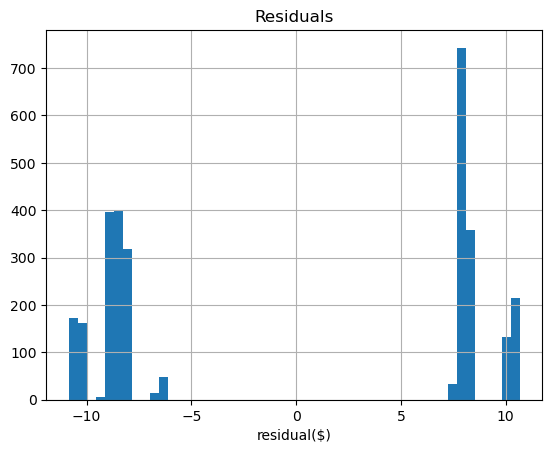

In [33]:
residuals.hist(bins = 50)
plt.title('Residuals')
plt.xlabel('residual($)')
plt.show()

Typical normal distribution of a discretized variable

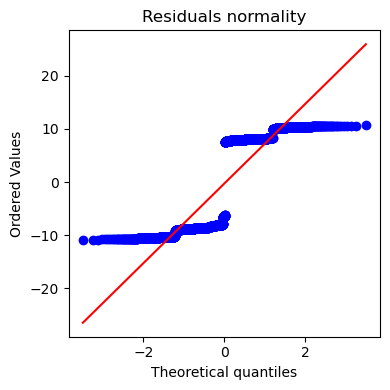

In [34]:
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(residuals, plot=ax) # QQ-Plot
plt.title('Residuals normality')
plt.tight_layout()
plt.show()

##### 2.  Provide the output and any calculations of the analysis you performed, including the model’s residual error.

Note: The output should include the predictions from the refined model you used to perform the analysis. 

In [35]:
D208_t1_output=X.copy()
D208_t1_output['data-MontlyCharge']=y
D208_t1_output['pred-MontlyCharge']=fitted_model.predict(X)
D208_t1_output['residuals']=fitted_model.predict(X)-y
D208_t1_output.to_csv('D208_t1_model_output.csv', index = False)

##### 3.  Provide the code used to support the implementation of the multiple regression models.

Included in this notebook

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part V: Data Summary and Implications

#### F.  Summarize your findings and assumptions by doing the following:

##### 1.  Discuss the results of your data analysis, including the following elements:

##### •  a regression equation for the reduced model

In [36]:
# Final reg. model Equation:
equation = ''

for (feature,coef) in dict(fitted_model.params).items():
    equation = equation+' + (' + feature +' * '+str(np.round(coef,3))+ ') '
print(target+' =  \n (',equation[12:])


MonthlyCharge =  
 ( 83.839)  + (Churn_Yes * 2.308)  + (InternetService_Fiber Optic * 20.067)  + (InternetService_None * -12.678)  + (Multiple_Yes * 32.394)  + (OnlineSecurity_Yes * 2.566)  + (OnlineBackup_Yes * 22.381)  + (DeviceProtection_Yes * 12.438)  + (TechSupport_Yes * 12.558)  + (StreamingTV_Yes * 41.641)  + (StreamingMovies_Yes * 51.8) 


------------------------------------------------------------------------------------------------

##### •  an interpretation of coefficients of the statistically significant variables of the model

All the variables represent paid services, probably the coefficients are the average monthly payments for each of these services:

(note: *Some very minor difference in the coef. values because of regenerating the models)


+ 'StreamingMovies_Yes':  
Using this service increases the average MonthlyCharge by 52.262 dol. (holding other variables constant).


+ 'StreamingTV_Yes':  
Using this service increases the average MonthlyCharge by 42.217 dol. (holding other variables constant).


+ 'InternetService_Fiber Optic':  
Using this service increases the average MonthlyCharge  by 19.755 dol. (holding other variables constant).


+ 'Multiple_Yes':  
Having multiple lines increases the average MonthlyCharge increases by 32.586 dol. (holding other variables constant).


+ 'InternetService_None':  
The absence of this service decreases the average MonthlyCharge by 12.978 dol. (holding other variables constant).

etc...


------------------------------------------------------------------------------------------------

##### •  the statistical and practical significance of the model


+ The model is statistically significant, all variables are statistically significant meaning that they are essential and can't be omitted (null hypothesis rejected)


+ All variables are practically meaningful as all of them represents services and it's relevant to estimate the MonthlyCharge based on these services.


+ The number of observations was more than sufficient for prediction and testing, even using only 5% of the total number of observation to train the model was sufficient. (model is robust and no overfitting)


+ the residuals are centred around zero, even though they take the form of bands due to the nature of the dependant variable.

------------------------------------------------------------------------------------------------

##### •  the limitations of the data analysis

- The target variable (MonthlyCharge) isn't perfectly continuous, seems to be rounded at specific levels of monthly payments (blocked).


- the model has a very high R2 , probably because the MonthlyCharge is determined directly as the summation of the payment for these services.


- Overfitting is not a problem in this model, for the mentioned reason, the prediction can follow simple arithmetics if we have the accurate services fees.


- Some observations have been artificially created according to the (D207 D208 D209 Churn Data Consideration and Dictionary.pdf), meaning the presence of some bias in estimation specifically for the "brand new customers" (Heteroscedasticity). 


- The risiduals of the the prediction (errors) are distributed around zero but none of the values is accurately zero , this can be due to that the target variable isn't perfectly continuous (blocked or finely descretized), aslo there could be another variable which is not included in the data set (another type of services or a discount offer for example.) needed for accurately estemating the MonthlyCharge but wasn't included in the model.

------------------------------------------------------------------------------------------------

##### 2.  Recommend a course of action based on your results.

+ Based on the final model features and coefficients, some services are significantly contributing to the value of the MonthlyCharge such as StreamingTV and StreamingMovies, these services should get marketed and sold more to increase the company revenue.


+ The absence of InternetService decreases the monthly charge value, marketing and selling this service should be one of the company priorities in sales.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part VI: Demonstration

#### G.  Provide a Panopto video recording that includes all of the following elements:
<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39419150-cc20-4a0e-8702-ad0b01351db1" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39419150-cc20-4a0e-8702-ad0b01351db1

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.



I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.



J.  Demonstrate professional communication in the content and presentation of your submission.

-----------------------------------------------------------------------------------------------------------------------------

#### References:
    
+ Massaron, L., & Boschetti, A. (2016). Regression analysis with Python. Packt Publishing. ISBN: 9781785286315

+ Bruce, P. C., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists: 50 essential concepts. Sebastopol, CA: O'Reilly Media, Incorporated.

+ https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

+ (WGU) Predictive Modeling – D208 course materials and Labs

+ General Questions/Answers from https://stackoverflow.com/

+ Documentation of Python packages: pandas, matplotlib,numpy,seaborn,sklearn and scipy

+ https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

+ https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/multi-linear-regression/Machine%20Learning%20-%20Multi%20Linear%20Regression%20Analysis.ipynb

+ https://www.youtube.com/watch?v=0MFpOQRY0rw&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=7